# Create Crypto Index

In [1]:
import pandas as pd
import datetime
import os

### Parameters

In [3]:
asset_ticket = "BTCUSDT"
timestamp = "1d"
start_date = "1 Jan, 2017"
end_date = "31 Dec, 2021"

In [4]:
input_data_path = '../data'
input_data_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_processed_and_technical_indicators"
input_data_extension = ".csv"
full_path_input_data = os.path.join(input_data_path, input_data_filename + input_data_extension)

In [5]:
df = pd.read_csv(full_path_input_data)

In [6]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_U,BBANDS_M,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open
0,1513209600000,16030.34,16445.00,15450.00,16334.98,11616.867151,1513295999999,1.860925e+08,86150,5999.075173,...,18391.237211,12695.5200,6999.802789,85678.916045,1570.046351,27.522205,12570.039200,1.025867,0.963797,1.019004
1,1513296000000,16334.98,17991.00,16298.45,17539.83,9181.273947,1513382399999,1.598097e+08,85478,4712.578400,...,18896.019332,13137.5110,7379.002668,89965.427218,1578.796612,27.561481,12668.038416,1.101379,0.997764,1.073759
2,1513382400000,17516.81,19539.00,17190.01,19102.66,4202.628709,1513468799999,7.629372e+07,51777,2308.847163,...,19641.813804,13636.2430,7630.672196,92606.725304,1633.810425,27.275392,12880.956879,1.115443,0.981344,1.090533
3,1513468800000,19120.19,19798.68,18510.00,18860.02,9177.183434,1513555199999,1.758674e+08,84581,4197.960835,...,20220.319637,14096.7440,7973.168363,88414.794602,1609.158252,27.027934,13280.439467,1.035486,0.968087,0.986393
4,1513555200000,18860.04,19300.00,17029.98,18856.25,10624.633071,1513641599999,1.963392e+08,91956,4690.302146,...,20684.597174,14544.7165,8404.835826,94885.560372,1656.362662,26.783773,13801.898709,1.023328,0.902966,0.999799


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open_time                     1479 non-null   int64  
 1   open                          1479 non-null   float64
 2   high                          1479 non-null   float64
 3   low                           1479 non-null   float64
 4   close                         1479 non-null   float64
 5   volume                        1479 non-null   float64
 6   close_time                    1479 non-null   int64  
 7   quote_asset_volumne           1479 non-null   float64
 8   number_of_trades              1479 non-null   int64  
 9   taker_buy_base_asset_volume   1479 non-null   float64
 10  taker_buy_quote_asset_volume  1479 non-null   float64
 11  ignore                        1479 non-null   int64  
 12  formatted_open_time           1479 non-null   object 
 13  for

### Set the index on the dataframe

In [8]:
df.index = pd.DatetimeIndex(df['formatted_open_time'])

### Add time-to-chart return

In [9]:
df['time_to_chart_return'] = (df['close']/ df['close'].shift(1)) -1

In [10]:
df.shape

(1479, 89)

In [11]:
#Drop all Not a number values using drop method.
df.dropna(inplace = True)

In [12]:
df.shape

(1478, 89)

### add the [crypto_index]

In [13]:
df['crypto_index'] = ((1 + df['time_to_chart_return']).cumprod()) * 1000

In [14]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2017-12-15,1513296000000,16334.98,17991.00,16298.45,17539.83,9181.273947,1513382399999,1.598097e+08,85478,4712.578400,...,7379.002668,89965.427218,1578.796612,27.561481,12668.038416,1.101379,0.997764,1.073759,0.073759,1073.758890
2017-12-16,1513382400000,17516.81,19539.00,17190.01,19102.66,4202.628709,1513468799999,7.629372e+07,51777,2308.847163,...,7630.672196,92606.725304,1633.810425,27.275392,12880.956879,1.115443,0.981344,1.090533,0.089102,1169.432714
2017-12-17,1513468800000,19120.19,19798.68,18510.00,18860.02,9177.183434,1513555199999,1.758674e+08,84581,4197.960835,...,7973.168363,88414.794602,1609.158252,27.027934,13280.439467,1.035486,0.968087,0.986393,-0.012702,1154.578702
2017-12-18,1513555200000,18860.04,19300.00,17029.98,18856.25,10624.633071,1513641599999,1.963392e+08,91956,4690.302146,...,8404.835826,94885.560372,1656.362662,26.783773,13801.898709,1.023328,0.902966,0.999799,-0.000200,1154.347909
2017-12-19,1513641600000,18856.25,18950.00,16300.00,17295.20,13210.748220,1513727999999,2.327906e+08,116569,5740.506184,...,9101.451223,91597.330362,1727.336758,26.580387,14281.641213,1.004972,0.864435,0.917213,-0.082787,1058.783053


<AxesSubplot:title={'center':'crypto_index'}, xlabel='formatted_open_time'>

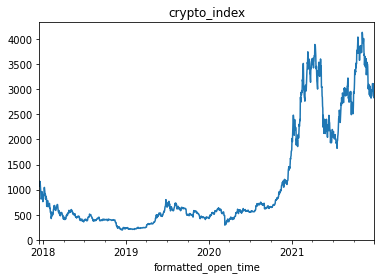

In [15]:
df['crypto_index'].plot(title='crypto_index')

## Export the Data

### Export parameters

In [16]:
export_path = "../data"
export_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_processed_technical_indicators_and_crypto_index"
export_extension = ".csv"
full_export_path = os.path.join(export_path, export_filename + export_extension)

### Export

In [17]:
df.to_csv(full_export_path, index=False)